<h2>Business Understanding</h2>
The Business task is to identify which factors make a car more or less expensive by designing a python application in
jupyter notebook. This application will allow not only dealer tagging a price for a particular car that will be on the
market, but also potential buyer to negociate a fair price for any particular car she/he/they is/are interested in.

In [375]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel,  RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

<h2 style="color:red;">Data Understanding</h2>

<p>The dataset (vehicles.csv) given is in .csv format.It consists of 18 columns and 426880 rows as shown below (see Figure 2). The target columns is "price" which is numerical. there are only two more columns numerical: "odometer" and "year", i.e., the rest of the columns are categorical (ordinal and nominal). Consequently, most of the dataset provided will be imbalanced before entering the modeling phase. All the columns, but "region", "price", and "state" contain a bunch of "NaN" values. Duplicates were not observed. It is thought that in order to provide more insight into the aforementioned dataset, a data preparation, i.e, data cleaning process needs to be done first.</p>

<h5>Read in the vehicles.csv file.</h5>

In [2]:
df = pd.read_csv('Downloads/practical_application_II_starter/data/vehicles.csv')

In [3]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<h5>Investigate the dataset for missing or problematic data.</h5>

In [5]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
df.loc[df.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


<h2 style="color:red;">Data Preparation</h2>

<h3 style="color:red;">Basic Cleaning</h3>

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [9]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,al
355,7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,clean,automatic,WDDGF56X68F140907,rwd,full-size,sedan,silver,al


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

<h5>Feature "other" is contained in several diferent variables, therefore, it was renamed as shown below:</h5>

In [11]:
df['fuel'] = df['fuel'].replace({'other': 'other_fuel'})
df['cylinders'] = df['cylinders'].replace({'other': 'other_cylinders'})
df['type'] = df['type'].replace({'other': 'other_type'})
df['transmission'] = df['transmission'].replace({'other': 'other_transmission'})

<h4 style='color:red;font-size:20px'>Visualization of Some Categorical Variables Present</h4>

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.fuel.value_counts().plot(kind='bar')
plt.title('Car Fuel Types Histogram')
plt1.set(xlabel = 'fuel', ylabel='Frequency of Car Fuel Type')

plt.subplot(1,3,2)
plt1 = df.manufacturer.value_counts().plot(kind='bar')
plt.title('Car Manufacturer Histogram')
plt1.set(xlabel = 'manufacturer', ylabel='Frequency of Car Manufacturer')

plt.subplot(1,3,3)
plt1 = df.condition.value_counts().plot(kind='bar')
plt.title('Car Condition Histogram')
plt1.set(xlabel = 'condition', ylabel='Frequency of Car Condition')

plt.show()

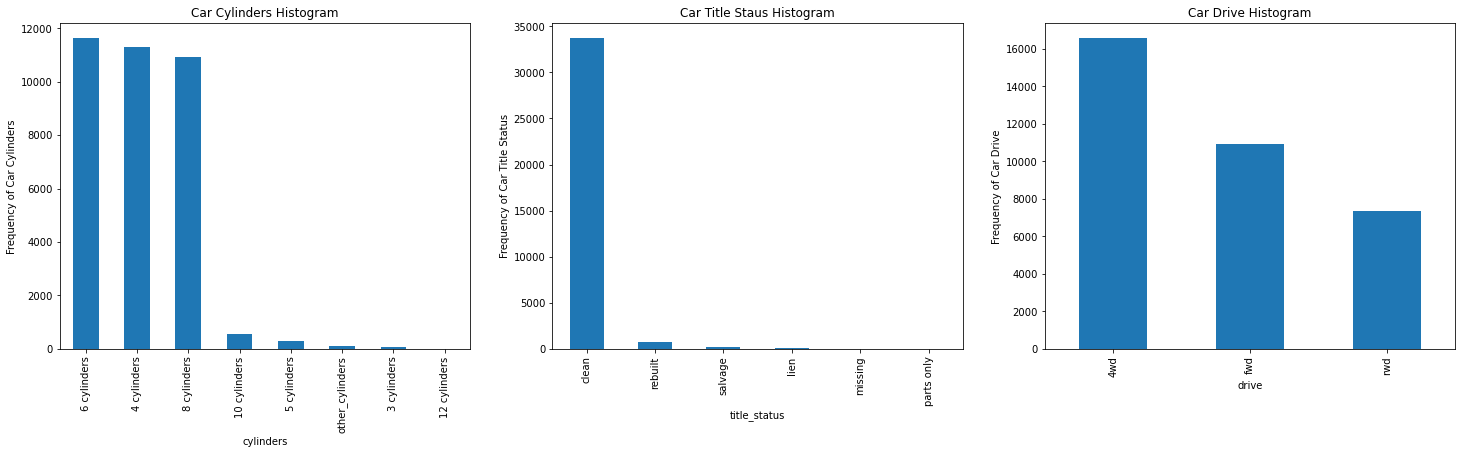

In [57]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.cylinders.value_counts().plot(kind='bar')
plt.title('Car Cylinders Histogram')
plt1.set(xlabel = 'cylinders', ylabel='Frequency of Car Cylinders')

plt.subplot(1,3,2)
plt1 = df.title_status.value_counts().plot(kind='bar')
plt.title('Car Title Staus Histogram')
plt1.set(xlabel = 'title_status', ylabel='Frequency of Car Title Status')

plt.subplot(1,3,3)
plt1 = df.drive.value_counts().plot(kind='bar')
plt.title('Car Drive Histogram')
plt1.set(xlabel = 'drive', ylabel='Frequency of Car Drive')


plt.show()

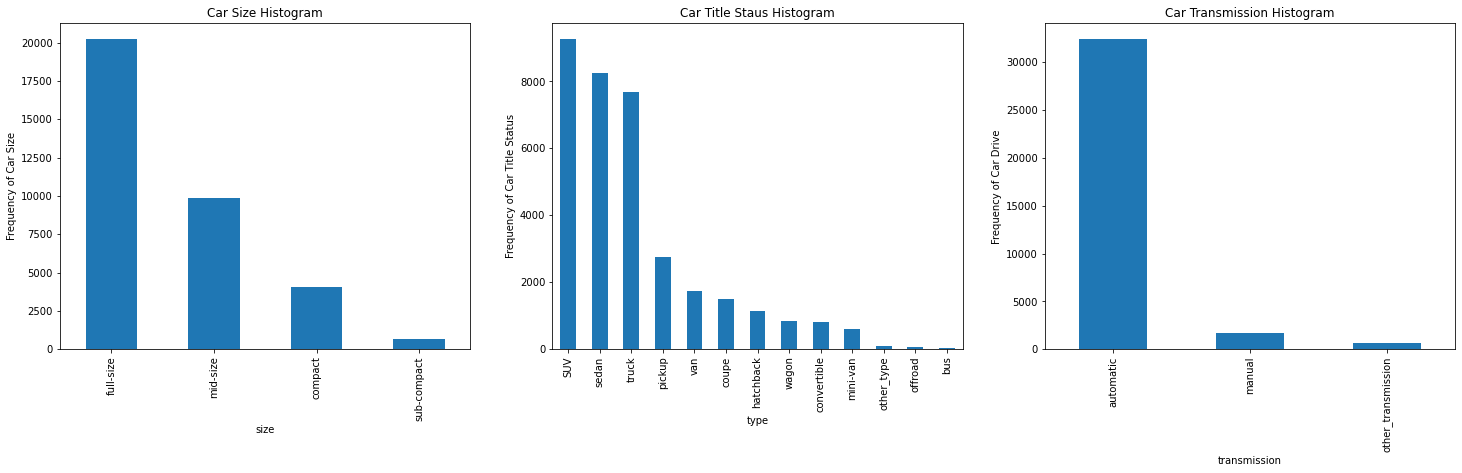

In [58]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['size'].value_counts().plot(kind='bar')
plt.title('Car Size Histogram')
plt1.set(xlabel = 'size', ylabel='Frequency of Car Size')

plt.subplot(1,3,2)
plt1 = df.type.value_counts().plot(kind='bar')
plt.title('Car Title Staus Histogram')
plt1.set(xlabel = 'type', ylabel='Frequency of Car Title Status')

plt.subplot(1,3,3)
plt1 = df.transmission.value_counts().plot(kind='bar')
plt.title('Car Transmission Histogram')
plt1.set(xlabel = 'transmission', ylabel='Frequency of Car Drive')


plt.show()

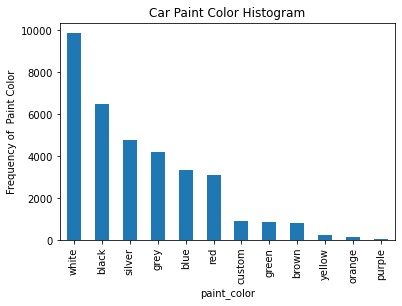

In [56]:
plt.figure(figsize=(6, 4))

plt.subplot(1,1,1)
plt1 = df.paint_color.value_counts().plot(kind='bar')
plt.title('Car Paint Color Histogram')
plt1.set(xlabel = 'paint_color', ylabel='Frequency of  Paint Color')

plt.savefig('What-Drives-the-Price-of-a-Car/images/histogram4.jpeg')

plt.show()

<h5 style='color:red;font-size:20px'>Treatment of Outliers</h5>

<p style='color:blue;font-size:18px'>Columns: "price", "odometer", and "year"</p>

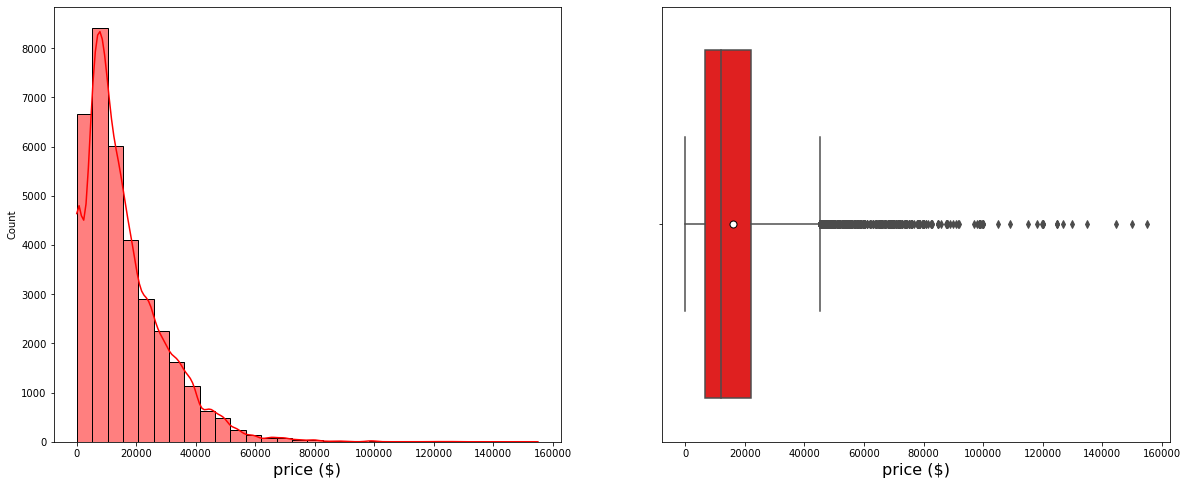

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('price ($)',fontsize=16)
ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('price ($)',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

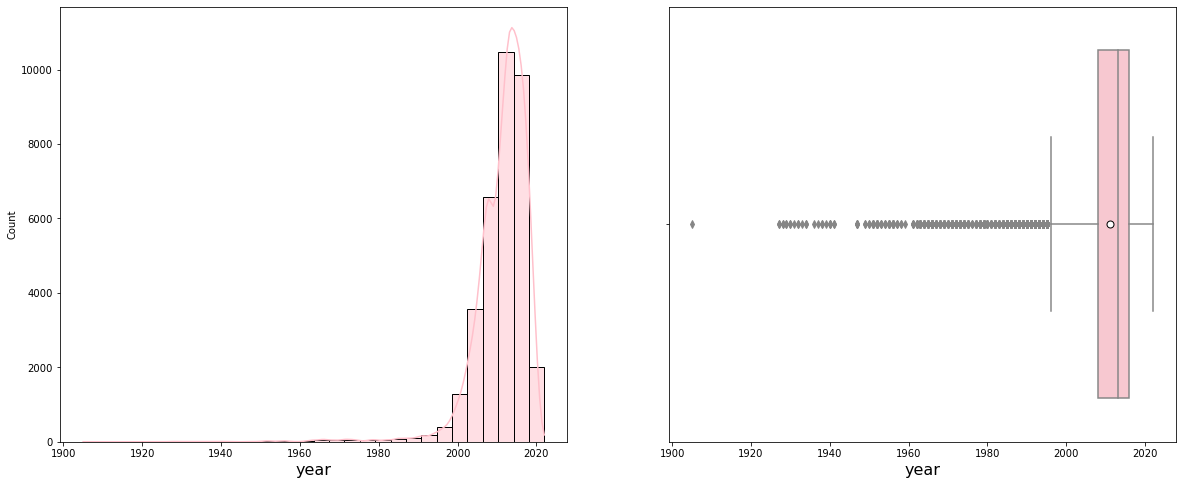

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="year",kde=True, color="pink",bins=30, ax=axes[0])
ax.set_xlabel('year',fontsize=16)
ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="pink")
ax.set_xlabel('year',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

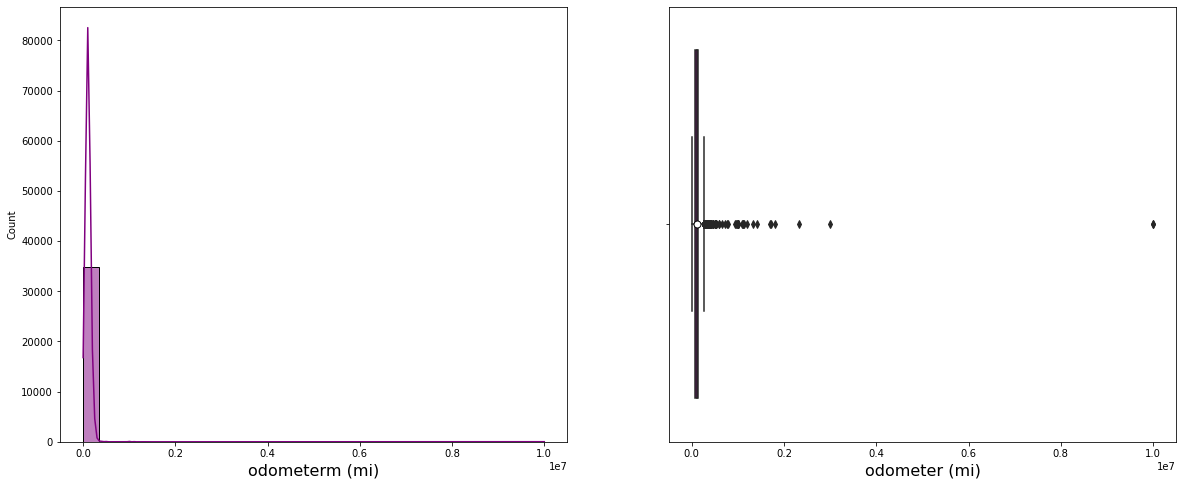

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="purple",bins=30, ax=axes[0])
ax.set_xlabel('odometerm (mi)',fontsize=16)
ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="purple")
ax.set_xlabel('odometer (mi)',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

<p style="color:red;"> Removing values equal to 0 and 1 in the target column "price"</p>

In [66]:
df=df.query('price!=0 and price!=1')

<h6 style='color:blue;font-size:18px'>First Pass using Inter quartile range (IQR) method</h6>

In [67]:
def outlierstreat(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr= third_quartile - first_quartile
    lower=first_quartile - 1.5*iqr
    lower=0 if lower<0 else lower
    upper=upper=third_quartile + 1.5*iqr
    0 if upper<0 else upper
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [68]:
variables=["price","odometer","year"]

In [69]:
for variable in variables:
    df=outlierstreat(df,variable)    

0 47825.0
0 254128.0
1997.5 2025.5


<h6 style='color:blue;font-size:18px'>Second Pass using DBSCAN method</h6>

In [70]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,variable,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df[variable].values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster'].values

In [71]:
for variable in variables:
    clusters=np.unique(remove_outliers_DBSCAN(df,variable,0.5,5)).tolist()
    for i in range(0,len(clusters)):
        df=df[df[variable]!=clusters[i]]

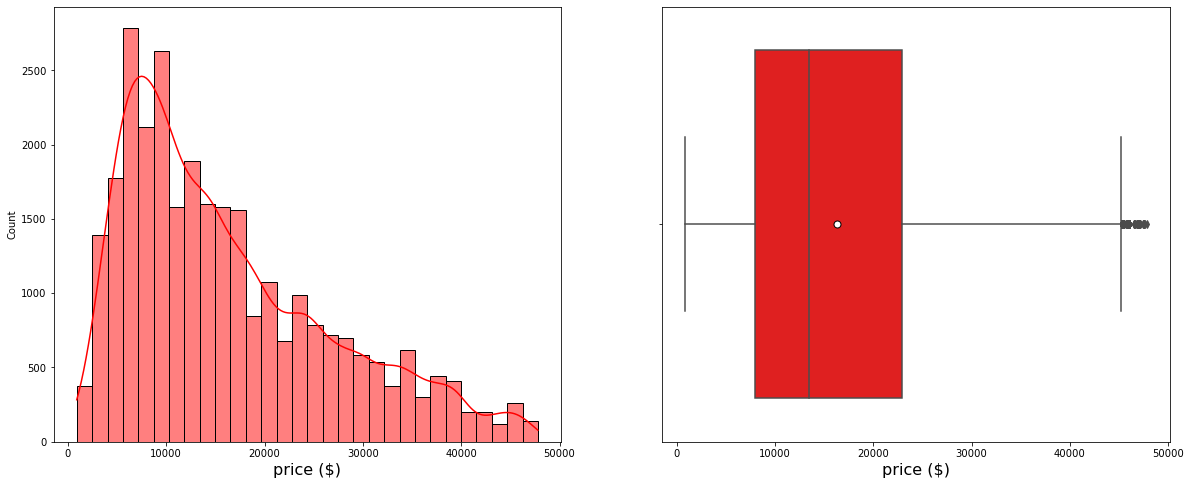

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=30, ax=axes[0])
ax.set_xlabel('price ($)',fontsize=16)
ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('price ($)',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

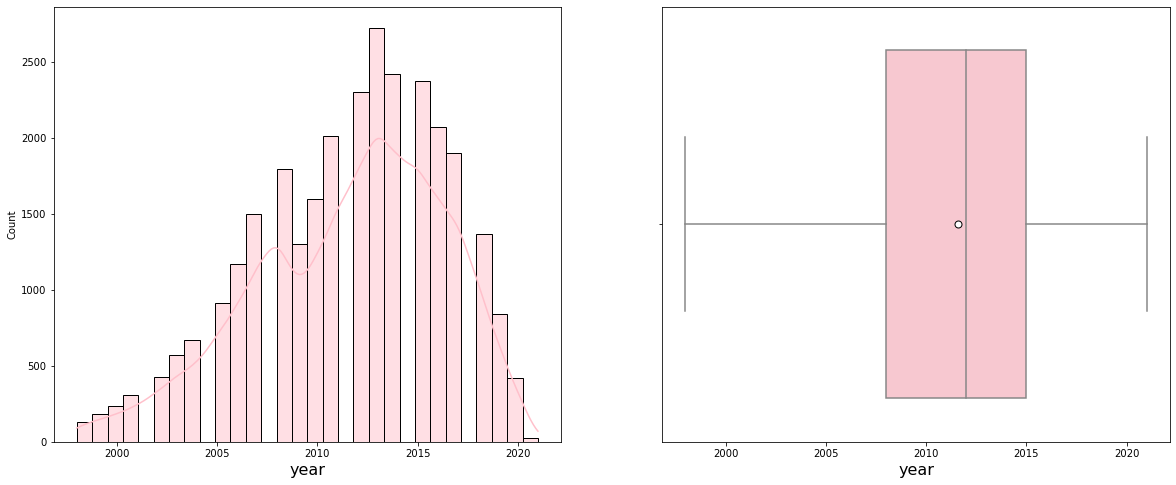

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="year",kde=True, color="pink",bins=30, ax=axes[0])
ax.set_xlabel('year',fontsize=16)
ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="pink")
ax.set_xlabel('year',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

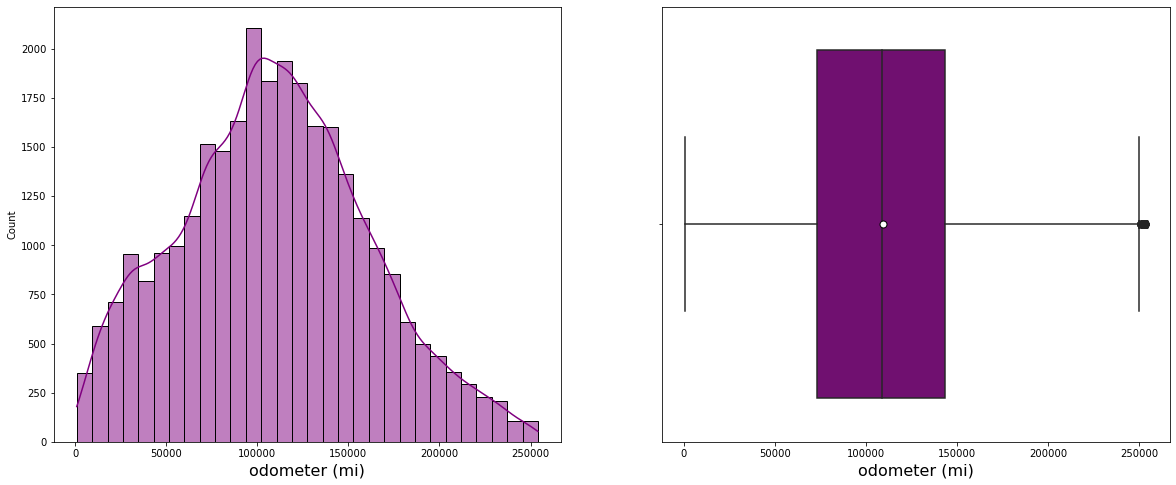

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="purple",bins=30,ax=axes[0])
ax.set_xlabel('odometer (mi)',fontsize=16)
ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="purple")
ax.set_xlabel('odometer (mi)',fontsize=16)
plt.savefig("log_prices.png",dpi=300)
plt.show()

<h6>Final Statistics after removing outliers for columns: "price","odometer", and "year".</h6>

In [389]:
print(df['price'].describe(),df['odometer'].describe(),df['year'].describe())

count    29250.000000
mean     16259.941573
std      10569.691351
min        895.000000
25%       7990.000000
50%      13499.000000
75%      22900.000000
max      47795.000000
Name: price, dtype: float64 count     29250.000000
mean     109347.298632
std       51804.863270
min         914.000000
25%       72849.000000
50%      108516.500000
75%      143583.750000
max      254061.000000
Name: odometer, dtype: float64 count    29250.000000
mean      2011.581504
std          4.757385
min       1998.000000
25%       2008.000000
50%       2012.000000
75%       2015.000000
max       2021.000000
Name: year, dtype: float64


<h6>Final Statistics in tabulated fashion for the target columns: "price".</h6>

In [230]:
from tabulate import tabulate
df2 = pd.DataFrame({'price': df['price'].describe()})
df2 = df2.reset_index()
df3 = pd.DataFrame({'odomoter': df['odometer'].describe()})
df3 = df2.reset_index()
print(tabulate(df2, headers='keys', tablefmt='psql'))

+----+---------+---------+
|    | index   |   price |
|----+---------+---------|
|  0 | count   | 30111   |
|  1 | mean    | 16145.7 |
|  2 | std     | 10561.3 |
|  3 | min     |   895   |
|  4 | 25%     |  7950   |
|  5 | 50%     | 13200   |
|  6 | 75%     | 22500   |
|  7 | max     | 47795   |
+----+---------+---------+


<h6> Dataset information after cleaning and outliers removal.</h6>

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29250 entries, 215 to 426793
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            29250 non-null  int64  
 1   region        29250 non-null  object 
 2   price         29250 non-null  int64  
 3   year          29250 non-null  float64
 4   manufacturer  29250 non-null  object 
 5   model         29250 non-null  object 
 6   condition     29250 non-null  object 
 7   cylinders     29250 non-null  object 
 8   fuel          29250 non-null  object 
 9   odometer      29250 non-null  float64
 10  title_status  29250 non-null  object 
 11  transmission  29250 non-null  object 
 12  VIN           29250 non-null  object 
 13  drive         29250 non-null  object 
 14  size          29250 non-null  object 
 15  type          29250 non-null  object 
 16  paint_color   29250 non-null  object 
 17  state         29250 non-null  object 
dtypes: float64(2), int64(2)

<h5 style='color:red;font-size:20px'>Visualization using Boxplot Independent variables vs. dependent variable "price"</h5>

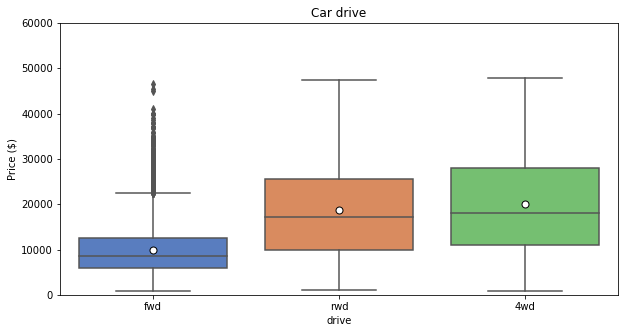

In [816]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.drive, y=df.price, palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car drive")
# Set x-axis label
plt.xlabel('drive')
#plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&drive.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>As expected, the most expensive used cars are the ones with four wheels traction</h7>

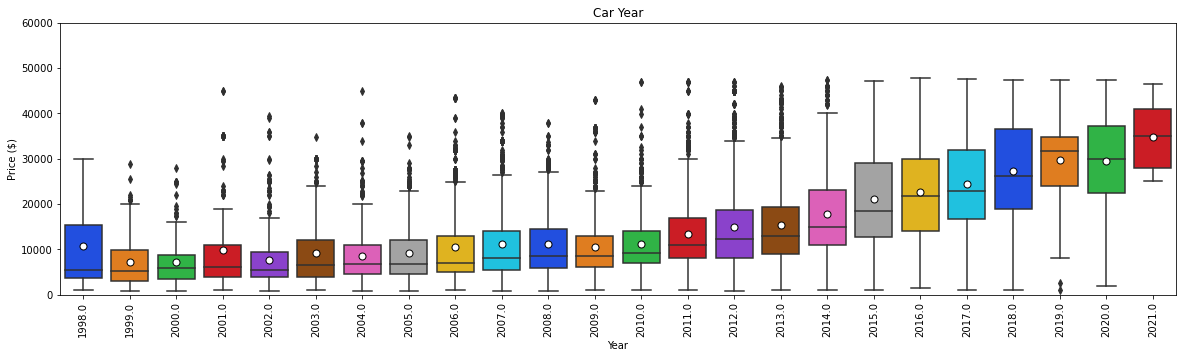

In [77]:
plt.figure(figsize=(20,5))
plt.ylim(0,60000)
sns.boxplot(x=df.year, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Year")
# Set x-axis label
plt.xlabel('Year')
plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&year.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>It is clear an upward trend, i.e. increases in both the median and the mean (white circular dot) of the price as year increases. Therefore, a really nice positive correlation between these two variables are expected..</h7>

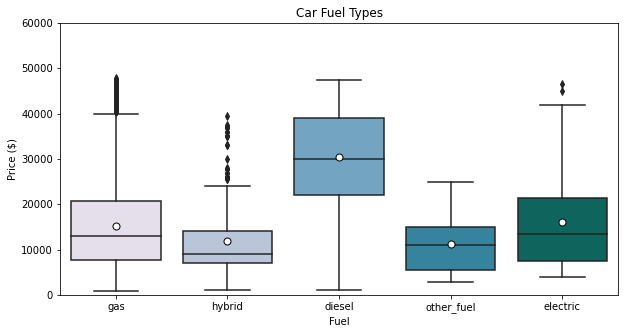

In [76]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.fuel, y=df.price, palette=("PuBuGn"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Fuel Types")
# Set x-axis label
plt.xlabel('Fuel')
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&fuel.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>The most expensive cars are the ones fueled by diesel,and the cheaper are the ones fueled by hybrid.</h7>

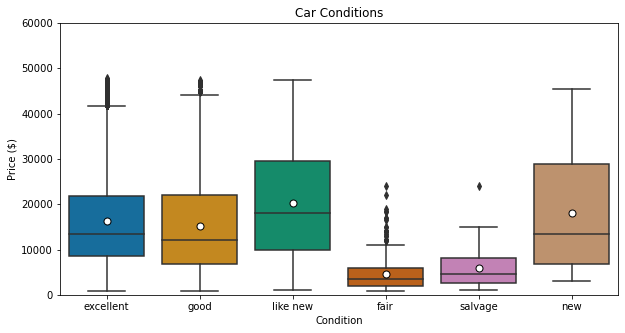

In [78]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.condition, y=df.price, palette=("colorblind"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Conditions")
# Set x-axis label
plt.xlabel('Condition')
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&condition.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>The most expensive cars are the ones that look like new as expected,and the cheaper are the ones looking fair.</h7>

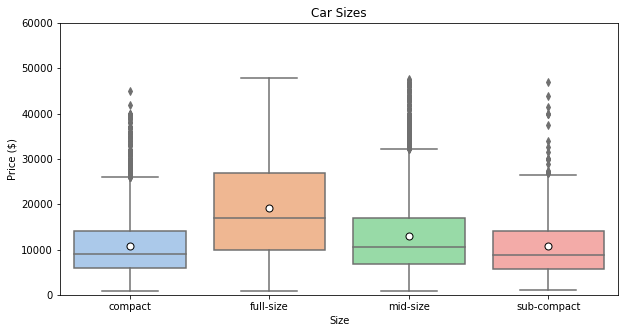

In [80]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df['size'], y=df.price, palette=("pastel"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Sizes")
# Set x-axis label
plt.xlabel('Size')
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&size.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>The most expensive cars are the full size as expected,and the cheaper are the compact, which makes sense.</h7>

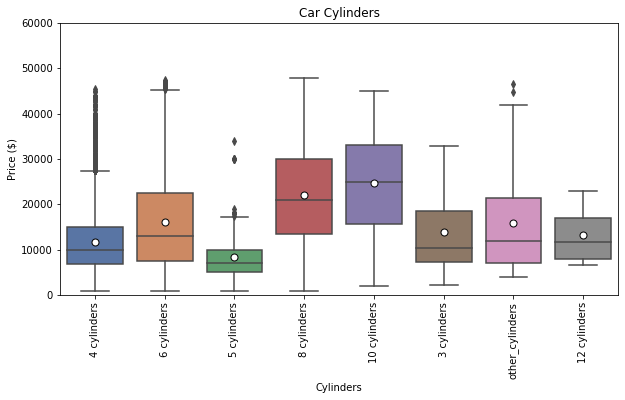

In [81]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.cylinders, y=df.price, palette=("deep"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Cylinders")
# Set x-axis label
plt.xlabel('Cylinders')
plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&cylinders.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>Really surprised that the cars with the most cylinders are not the most expensive, that label belongs to the one with 10 cylinders. Likewise, the cheapers are not the ones with 4 cylinders, the ones with 5 cylinders are.
.</h7>

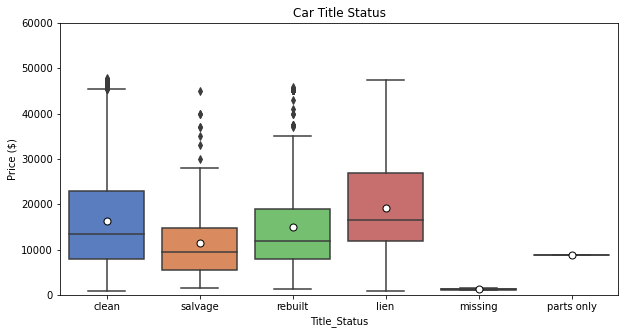

In [82]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.title_status, y=df.price, palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Title Status")
# Set x-axis label
plt.xlabel('Title_Status')
#plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&titlestatus.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>The cars with title status as "lien" are slightly the most expensive, the cheaper are the ones with title status listed as "missing" as must be expected.
.</h7>

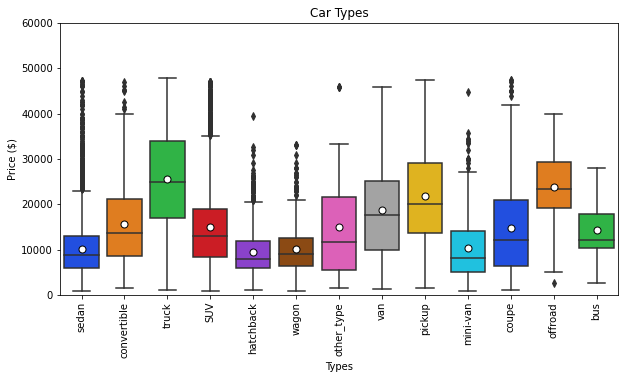

In [83]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.type, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Types")
# Set x-axis label
plt.xlabel('Types')
plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&types.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>There is not observable pattern in this category, trucks are even more expensive than the bus and convertibles as many may have not thought. A battle between the sedan and the hatchback cars for the cheapers cars is observed
.</h7>

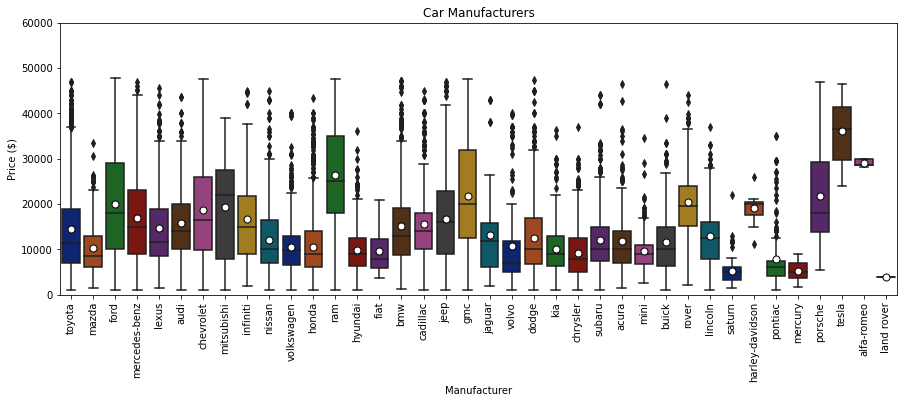

In [84]:
plt.figure(figsize=(15,5))
plt.ylim(0,60000)
sns.boxplot(x=df.manufacturer, y=df.price, palette=("dark"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Manufacturers")
# Set x-axis label
plt.xlabel('Manufacturer')
plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&Manufacturer.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>A bit surprised that the most expensive used cars by a relative large margin are the ones manufactured by Tesla. Th cheapers are the ones manufactured by satum.
.</h7>

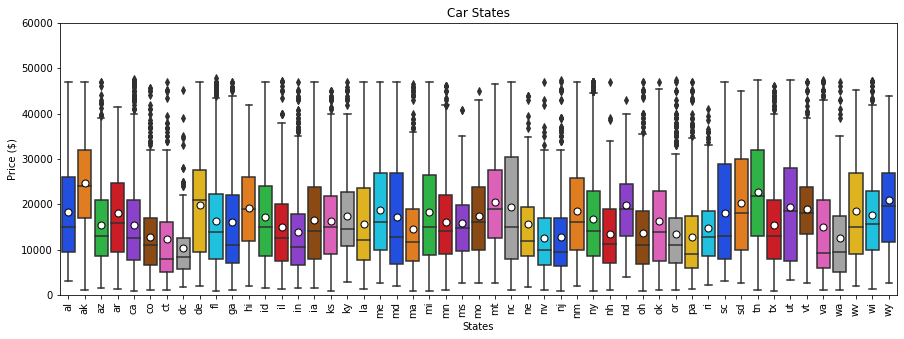

In [85]:
plt.figure(figsize=(15,5))
plt.ylim(0,60000)
sns.boxplot(x=df.state, y=df.price, palette=("bright"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car States")
# Set x-axis label
plt.xlabel('States')
plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&states.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>Certainly, the place to look for cheapers used cars is Washington DC, and the ones not to go for that are: Arkansas,Tennessee, and South Dakota , in that order.</h7>

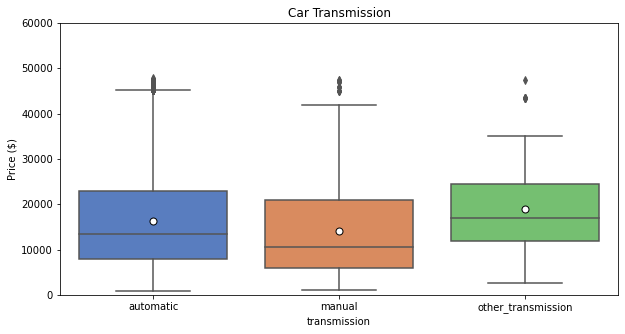

In [321]:
plt.figure(figsize=(10,5))
plt.ylim(0,60000)
sns.boxplot(x=df.transmission, y=df.price, palette=("muted"),showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Car Transmission")
# Set x-axis label
plt.xlabel('transmission')
#plt.xticks(rotation = 90)
# Set y-axis label
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Price ($)')
plt.savefig('What-Drives-the-Price-of-a-Car/images/boxplotprice&transmission.png')
plt.show()

<h6 style="color:red;">Observation:</h6><h7>It seems that there is not much difference in price among the different transmission types.</h7>

<h4 style="color:red;">Analysis/Treatment of the Categorical Features</h4>

<h5 style="color:red;">Nominal Features:</h5><p>

<p>Nominal features are categorical features that have no numerical importance. Order does not matter. Most of the columns were found to fall in this category as follows: "fuel", "cylinders","type","transmission", "manufacturer", "state", "size", "paint_color", "title_status", "model", and "drive". The Pandas getdummies function to creates dummy variables was used to treat them. A dummy variable is a numerical variable that encodes categorical information, having two possible values: 0 or 1. It is important to highlight that the columns: "model" and "region" were not encoded, i.e., not used for the rest of the analysis, since they contain 4375 and 389 features respectively, i.e, way too may no handle in the modeling phase. Otherwise, it will takes geological ages to do any modelling in the tiny laptop used.</p>

<p> The nominal features identified in the data set provided are: "fuel","cylinders","type", "transmission"</p>

In [523]:
fuel_encoded=pd.get_dummies(df['fuel'])
cylinders_encoded=pd.get_dummies(df['cylinders'])
type_encoded=pd.get_dummies(df['type'])
transmission_encoded=pd.get_dummies(df['transmission'])
manufacturer_encoded=pd.get_dummies(df['manufacturer'])
state_encoded=pd.get_dummies(df['state'])
size_encoded=pd.get_dummies(df['size'])
paint_color_encoded=pd.get_dummies(df['paint_color'])
title_status_encoded=pd.get_dummies(df['title_status'])
drive_encoded=pd.get_dummies(df['drive'])
wag=pd.concat([df,fuel_encoded,cylinders_encoded,type_encoded,transmission_encoded,manufacturer_encoded,state_encoded,
               size_encoded,paint_color_encoded,title_status_encoded,drive_encoded],axis=1)

In [524]:
wag.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,yellow,clean,lien,missing,parts only,rebuilt,salvage,4wd,fwd,rwd
426777,7303328804,wyoming,31995,2020.0,ram,promaster,good,6 cylinders,gas,18701.0,...,0,1,0,0,0,0,0,0,1,0
426779,7303328811,wyoming,5995,2004.0,chevrolet,colorado,good,5 cylinders,gas,233011.0,...,0,1,0,0,0,0,0,1,0,0
426780,7303328817,wyoming,34995,2014.0,gmc,sierra,good,8 cylinders,gas,58095.0,...,0,1,0,0,0,0,0,1,0,0
426782,7303328786,wyoming,23995,2013.0,toyota,tundra,good,8 cylinders,gas,114215.0,...,0,1,0,0,0,0,0,1,0,0
426783,7303328773,wyoming,15999,2000.0,ram,3500,good,6 cylinders,gas,199090.0,...,0,1,0,0,0,0,0,1,0,0
426784,7303328776,wyoming,24995,2014.0,gmc,sierra,good,8 cylinders,gas,128722.0,...,0,1,0,0,0,0,0,1,0,0
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,...,0,1,0,0,0,0,0,1,0,0
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,...,0,1,0,0,0,0,0,0,1,0
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,...,0,1,0,0,0,0,0,1,0,0
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,...,0,1,0,0,0,0,0,0,1,0


In [94]:
wag.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
                 ...   
rebuilt           uint8
salvage           uint8
4wd               uint8
fwd               uint8
rwd               uint8
Length: 161, dtype: object

<h5 style="color:red;">Ordinal Features:</h5><p>
The column "condition" is ordered values,  so a numeric value representing the scale can be used. 
In this case, a scale of 0 - 5 can associate the categories with an order in a list from least to greatest</p>

In [525]:
oe = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new','new']])
oe.fit_transform(df[['condition']])

array([[3.],
       [3.],
       [3.],
       ...,
       [4.],
       [3.],
       [3.]])

In [526]:
ordinal_ohe_transformer = make_column_transformer((OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new','new']]), ['condition']),
                                          remainder='passthrough')

<h5>Since, most of the columns are imbalanced values (0 or 1), it was decided to scale the columns: "year", "odometer", and "price" as follow:</h5>

In [531]:
wag['price']=wag['price'].div(10000)

In [532]:
wag['price'].describe()

count    29250.000000
mean         1.625994
std          1.056969
min          0.089500
25%          0.799000
50%          1.349900
75%          2.290000
max          4.779500
Name: price, dtype: float64

In [529]:
wag['odometer']=wag['odometer'].div(100000)

In [530]:
wag['odometer'].describe()

count    29250.000000
mean         1.093473
std          0.518049
min          0.009140
25%          0.728490
50%          1.085165
75%          1.435837
max          2.540610
Name: odometer, dtype: float64

In [527]:
wag['year']=df['year'].div(1000)

In [528]:
wag['year'].describe()

count    29250.000000
mean         2.011582
std          0.004757
min          1.998000
25%          2.008000
50%          2.012000
75%          2.015000
max          2.021000
Name: year, dtype: float64

<h4>Splitting the variables</h4>

<p>Splitting the dependent variable from the independent variables and assigning them to y and X respectively was done as follows:</p>

In [535]:
X=wag.drop(['id','region','price','manufacturer','model','cylinders','fuel','type','transmission','state','size',
            'paint_color','drive','title_status','VIN'], axis = 1)
y = wag['price']

In [536]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29250 entries, 215 to 426793
Columns: 145 entries, year to rwd
dtypes: float64(2), object(1), uint8(142)
memory usage: 5.9+ MB


<h5> Histogram of the independent variables</h5>

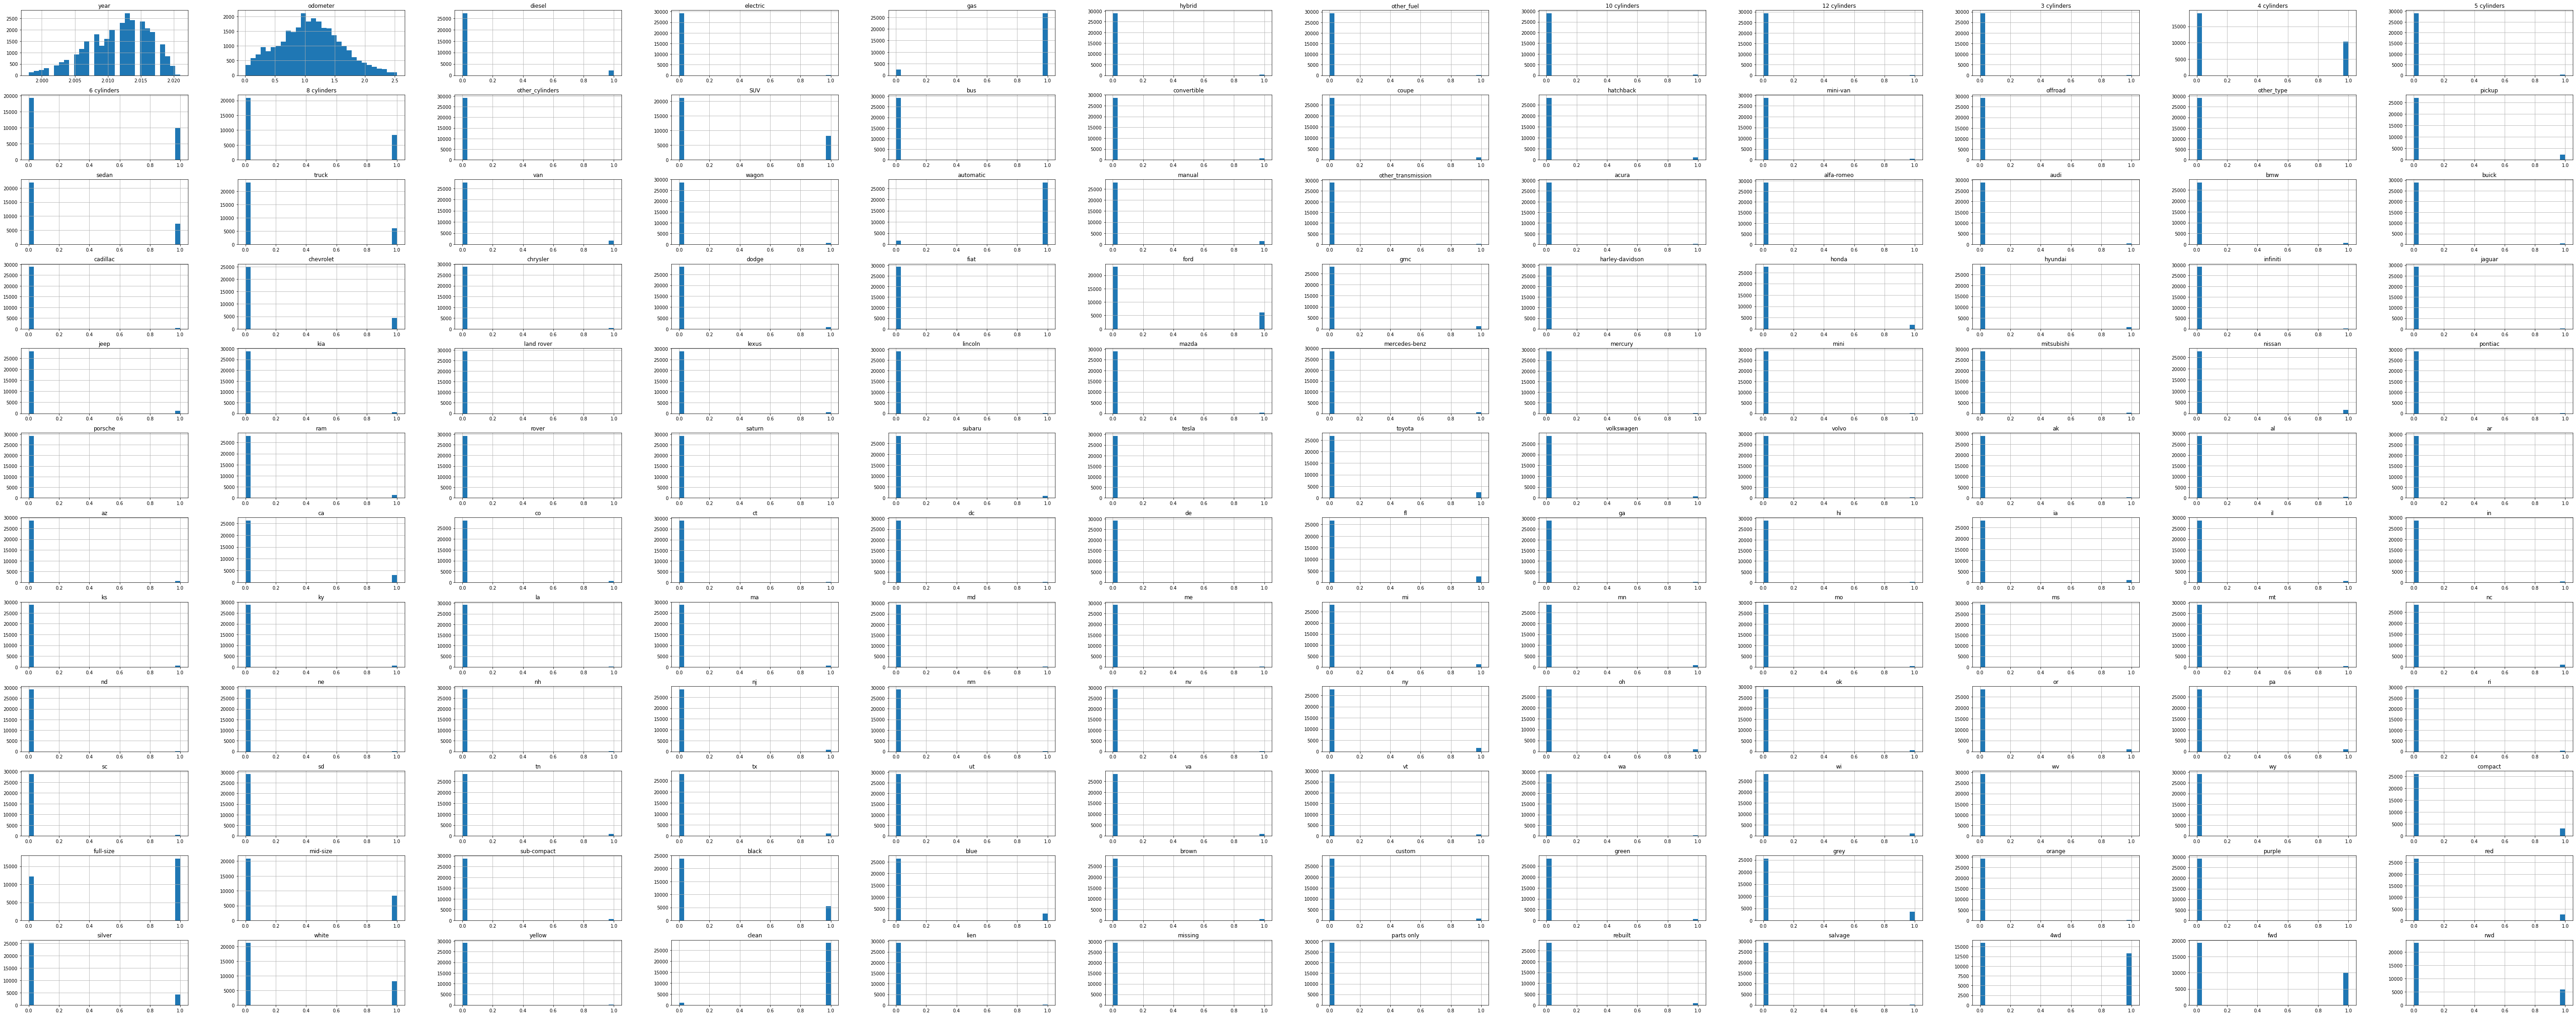

In [347]:
X.hist(bins=30, figsize=(100, 40))
plt.savefig('What-Drives-the-Price-of-a-Car/images/Xhisto_2.png')

<h5>Using permutation_importance function to reduce the final number of independent variables that will be finally used in the Modeling phase.</p>

In [410]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size=0.3, random_state=22)

<p>Since the dependent dataset X contains 145 columns, it was decided to give a try to reduce that number of columns by creating a simple pipeline model, and use the permutation_importance function, and then, filtering the result to only leave the columns with the importance greater than 0</p>

In [411]:
model = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()), ('linear', LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()), ('linear', LinearRegression())])

In [412]:
r = permutation_importance(model,X_test, y_test,n_repeats=30,random_state=0)    
perm=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [448]:
len(perm.query('Importance>0'))

138

In [447]:
perm.query('Importance>0.000').head(20)

,Column,Importance
5,gas,3.203586e+25
3,diesel,2.693624e+25
29,automatic,2.329551e+25
30,manual,2.044859e+25
16,SUV,8.075910e+24
25,sedan,7.649359e+24
142,4wd,7.022103e+24
143,fwd,6.382230e+24
26,truck,6.368032e+24
6,hybrid,4.889447e+24


In [415]:
perm.query('Importance>0')['Column'].unique()

array(['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinder

<p>As a result, only 138 columns satisfied the aforementioned condition. It helped to improve the statistics (MSE and R^2 score) in the regression models built later on. The resulting names of the 138 columns are shown below</p>

In [552]:
X_1=X[['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinders', 'alfa-romeo', 'tesla',
       'harley-davidson', '12 cylinders', 'year', 'odometer', 'ny', 'nj',
       'oh', 'pa', 'vt', 'fl', 'condition', 'ma', 'wi', 'mn', 'ct', 'va',
       'co', 'tx', 'az', 'ia', 'dc', 'ks', 'ak', 'ri', 'mi', 'in', 'il',
       'ky', 'nh', 'ga', 'me', 'nv', 'wv', 'or', 'mt', 'la', 'al', 'md',
       'ar', 'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn']]
y = wag['price']

<h3 style="color:red">Modeling</h3>

<h5> Four regression models were built as follows:</h5>

<h5 style="color:red;">Cross-Validation Methods<h5>

<p>Most of the independent variables, i.e. columns (after treating the nominal categories) are imbalanced data. But, the target variable (column: "price") is continuous, and the final dataset assembled is considered large. Thus, it was decided to use Hold-out based cross-validation method. In this technique, the whole dataset is randomly partitioned into a training set and validation set. Using a rule of thumb 70% of the whole dataset was used as a training set and the remaining 30% was used as the validation set. However, it was also used the K-Fold Cross-Validation for completness, in order to also compare among the regression models bult in term of their metrics. In this last technique, a k=5 was chosen, which is recommended for large dataset</p>

<h4 style="color:red;">Method 1:</h4><p>Ridge regressor to extract coefficients</p>

<h6> Pipeline model using Ridge Regression Model</h6>

In [807]:
selector_pipe = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= Ridge()))])
selector_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge()))])

<h6> Range of  Hyperparameter Alpha being tested</h6>

In [675]:
model_param_dict={'targetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

<h6> Using K-Fold cross-validation method using the KFold function to evaluate metrics</h6>

In [677]:
cv = KFold(n_splits=5,random_state=None, shuffle=False)
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
scores1 = cross_val_score(model_grid, X_1,y,scoring='neg_mean_squared_error',cv=cv)

In [678]:
cv = KFold(n_splits=5,random_state=None, shuffle=False)
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
scores2 = cross_val_score(model_grid, X_1,y,scoring='r2',cv=cv)

In [680]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores1)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores1),np.std(scores1)))
print('K-Fold Cross Validation r^2 scores: %s' % scores2)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores2),np.std(scores2)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.22082817 -0.2259608  -0.20629457 -0.19602111 -0.20871716]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.212 +/- 0.011
K-Fold Cross Validation r^2 scores: [0.79208419 0.791741   0.82771156 0.80179281 0.82569863]
K-Fold Cross Validation R^2: 0.808 +/- 0.016


<h5>Hold-Out cross-validation method using the train_test_split function to evaluate metrics</h5>

In [817]:
X_train, X_test, y_train, y_test =train_test_split( X_1, y, test_size=0.3, random_state=22)

In [818]:
model_grid = GridSearchCV(selector_pipe, param_grid=model_param_dict)
model_grid.fit(X_train, y_train)
model_train_preds = model_grid.predict(X_train)
model_test_preds = model_grid.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Ridge Train MSE: {model_train_mse}')
print(f'Ridge Test MSE: {model_test_mse}')
print(f'Ridge R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Ridge Train MSE: 0.20460256202743574
Ridge Test MSE: 0.19593211503664576
Ridge R^2 Score::0.8249457260205145


<h6> Histogram difference between validation data and the one predicted by the Ridge regression model</h6>

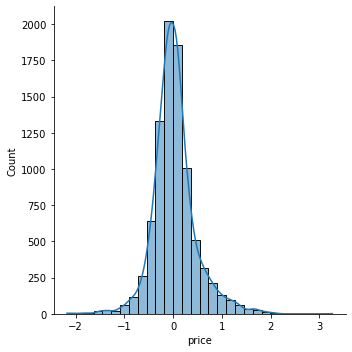

In [427]:
sns.displot(y_test-model_test_preds, bins=30, kde=True)
plt.savefig('What-Drives-the-Price-of-a-Car/images/RidgeModel_4.png')

<h6>Getting the coeficient after fitting the data using Hold-Out Cross-Validation,the Ridge Regression Model, using GridSearchCV to estimate the optimum alpha</h6>

In [819]:
best_model=model_grid.best_estimator_

In [820]:
best_model['targetregressor'].regressor_.coef_

array([ 1.49655129e-02, -3.91523361e-02,  5.15287897e-02, -9.85683515e-03,
        9.09946161e-03, -1.76424939e-02, -4.79862593e-02,  2.85675114e-02,
       -3.38490825e-02,  5.74796013e-02, -1.38946333e-02,  4.55792692e-03,
        9.22171196e-03, -3.14468777e-03,  3.61313528e-03,  2.49417234e-02,
        8.67996850e-02,  2.85576161e-03,  5.35303133e-02, -8.26911511e-03,
        5.60390370e-03, -1.81975818e-02,  3.07720572e-03, -7.98337148e-03,
       -9.22885123e-03,  3.97252205e-03,  1.69282781e-02, -7.18679627e-03,
       -4.89941938e-03, -9.19565965e-04,  2.58314598e-02, -2.50062122e-03,
       -1.77627372e-03,  2.96464252e-02, -4.07395706e-03, -7.92651763e-03,
        1.15479606e-03,  5.92865120e-04, -2.67955078e-03, -6.00632847e-03,
        6.71028289e-03, -2.14149816e-03,  3.87649136e-03, -5.30201084e-02,
        8.78221395e-04,  5.27155798e-02,  1.09630745e-01,  9.98703253e-02,
        3.40023335e-03,  1.10390768e-01,  8.48943944e-02, -1.79130440e-03,
        4.88840984e-02,  

In [821]:
coef=pd.DataFrame(best_model['targetregressor'].regressor_.coef_,columns=['coef_best_model'],index=['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinders', 'alfa-romeo', 'tesla',
       'harley-davidson', '12 cylinders', 'year', 'odometer', 'ny', 'nj',
       'oh', 'pa', 'vt', 'fl', 'condition', 'ma', 'wi', 'mn', 'ct', 'va',
       'co', 'tx', 'az', 'ia', 'dc', 'ks', 'ak', 'ri', 'mi', 'in', 'il',
       'ky', 'nh', 'ga', 'me', 'nv', 'wv', 'or', 'mt', 'la', 'al', 'md',
       'ar', 'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn']).sort_values(by = "coef_best_model", ascending = False)

In [822]:
coef.query('coef_best_model==0').value_counts().sum()

0

<h6> Listing the 10 largest coeficients for the Ridge Regression Model</h6>

In [806]:
coef.query('coef_best_model>0').sort_values(by = "coef_best_model", ascending = False).head(10)

,coef_best_model
odometer,0.177017
honda,0.110391
chevrolet,0.109631
orange,0.099870
van,0.086800
purple,0.084894
gmc,0.060942
ram,0.059090
chrysler,0.057865
hybrid,0.057480


<h5>Listing the 10 largest coeficients affecting negatively the price of a used car for the Ridge Regression Model</h5>

In [823]:
coef.query('coef_best_model<0').sort_values(by = "coef_best_model", ascending = True).head(10)

,coef_best_model
ny,-0.125440
6 cylinders,-0.053020
4wd,-0.047986
diesel,-0.039152
truck,-0.033849
white,-0.018198
sedan,-0.017642
nj,-0.015471
pa,-0.013930
rwd,-0.013895


In [473]:
model_grid.cv_results_

{'mean_fit_time': array([0.37444949, 0.24628153, 0.11841316, 0.12025161, 0.11756883]),
 'std_fit_time': array([0.16612532, 0.11925586, 0.00219329, 0.00370313, 0.00323436]),
 'mean_score_time': array([0.03102479, 0.02840028, 0.02088504, 0.01684523, 0.01716166]),
 'std_score_time': array([0.00948156, 0.01755775, 0.00810724, 0.00093639, 0.00162087]),
 'param_targetregressor__regressor__alpha': masked_array(data=[0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'targetregressor__regressor__alpha': 0.1},
  {'targetregressor__regressor__alpha': 1.0},
  {'targetregressor__regressor__alpha': 10.0},
  {'targetregressor__regressor__alpha': 100.0},
  {'targetregressor__regressor__alpha': 1000.0}],
 'split0_test_score': array([0.81494268, 0.81493974, 0.81492148, 0.81472731, 0.81120416]),
 'split1_test_score': array([0.81763888, 0.81763558, 0.81763408, 0.81739932, 0.81346712]),
 'split2_test_scor

<h6>The variables that have the biggest impact on predicting the price car can be estimated using the permutuation_importance function. This one was applied using the validation data from the hold-out cross-validation, and the Ridge as a regression model. Figure 59 shows the results for the 10 most important variables. In the aforementioned picture, the three most important features were gas,diesel, and automatic in that order.

In [809]:
r2 = permutation_importance(model_grid,X_test, y_test,n_repeats=30)    
perm2=pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(by = "Importance", ascending = False)

In [812]:
perm2.query('Importance>0.000').head(10)

,Column,Importance
5,gas,3.203586e+25
3,diesel,2.693624e+25
29,automatic,2.329551e+25
30,manual,2.044859e+25
16,SUV,8.075910e+24
25,sedan,7.649359e+24
142,4wd,7.022103e+24
143,fwd,6.382230e+24
26,truck,6.368032e+24
6,hybrid,4.889447e+24


<h4 style="color:red;">Method 2:</h4><p>SequentialFeatureSelection + Linear Regression</p>

<h6>Pipeline model using Sequential Feature + Linear Regression Model</h6>

In [744]:
sequential_pipe =Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('selector', SequentialFeatureSelector(LinearRegression())),
                    ('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= LinearRegression()))])
sequential_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

<h6> Range of Hyperparameter n-features_to select being tested</h6>

In [710]:
sequential_param_dict = {'selector__n_features_to_select':[4,6,8,10]}

<h6>Using K-Fold cross-validation method to evaluate metrics</h6>

In [681]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
scores3 = cross_val_score(model_grid, X_1,y,scoring='neg_mean_squared_error',cv=cv)

In [682]:
cv = KFold(n_splits=5)
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
scores4 = cross_val_score(model_grid, X_1,y,scoring='r2',cv=cv)

In [683]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores3)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores3),np.std(scores3)))
print('K-Fold Cross Validation r^2 scores: %s' % scores4)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores4),np.std(scores4)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.28110287 -0.26220846 -0.24872921 -0.2296558  -0.24180875]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.253 +/- 0.018
K-Fold Cross Validation r^2 scores: [0.7353339  0.75833298 0.79227195 0.76778302 0.79806358]
K-Fold Cross Validation R^2: 0.770 +/- 0.023


<h6>Using Hold-Out Cross-validation method to evaluate metrics (same as previous model)</h6>

In [745]:
model_grid = GridSearchCV(sequential_pipe, param_grid=sequential_param_dict)
model_grid.fit(X_train, y_train)
model_train_preds = model_grid.predict(X_train)
model_test_preds = model_grid.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Sequential Train MSE: {model_train_mse}')
print(f'Sequential Test MSE: {model_test_mse}')
print(f'Sequential R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Sequential Train MSE: 0.2508995015674882
Sequential Test MSE: 0.2405066955505654
Sequential R^2 Score::0.7851208569410126


<h6>Histogram difference between validation data and the one predicted by the Ridge regression model</h6>

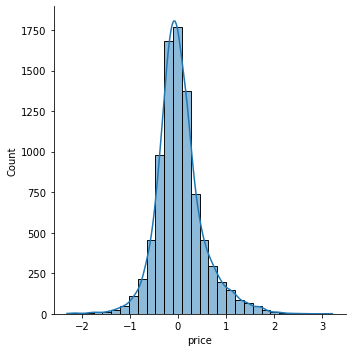

In [480]:
sns.displot(y_test-model_test_preds, bins=30, kde=True)
plt.savefig('What-Drives-the-Price-of-a-Car/images/Model2_4.png')

<h6>Coeficients of the 10 features selected by using Hold-Out Cross-Validation, Sequentialfeatures + Linear Regression, and estimating the optimun number of features using  GridSearchCV</h6>

In [ ]:
best_estimator =model_grid.best_estimator_
best_selector =best_estimator.named_steps['selector']
best_model = model_grid.best_estimator_
feature_names =X_train.columns[best_selector.get_support()]
coefs=best_model['targetregressor'].regressor_.coef_

In [482]:
pd.DataFrame([coefs.T], columns = feature_names, index = ['targetregressor'])

,automatic,4wd,truck,hybrid,clean,6 cylinders,ford,honda,odometer,ny
targetregressor,0.087967,-0.034249,-0.071315,0.064882,0.027851,-0.063683,0.050721,0.02991,0.173222,-0.12828


In [483]:
model_grid.cv_results_

{'mean_fit_time': array([13.88858137, 14.78549304, 16.7319622 , 22.6147748 ]),
 'std_fit_time': array([4.22537649, 4.38645885, 1.04431917, 0.8561634 ]),
 'mean_score_time': array([0.02461925, 0.01950336, 0.01769781, 0.01680145]),
 'std_score_time': array([0.00492807, 0.00176792, 0.00216124, 0.00063072]),
 'param_selector__n_features_to_select': masked_array(data=[4, 6, 8, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'selector__n_features_to_select': 4},
  {'selector__n_features_to_select': 6},
  {'selector__n_features_to_select': 8},
  {'selector__n_features_to_select': 10}],
 'split0_test_score': array([0.64970034, 0.7452821 , 0.76315194, 0.77406054]),
 'split1_test_score': array([0.65445888, 0.74314661, 0.76447567, 0.77222353]),
 'split2_test_score': array([0.64838411, 0.73958283, 0.76457837, 0.7758057 ]),
 'split3_test_score': array([0.65429371, 0.73905401, 0.75901521, 0.76841715]),
 'split4_test_score': array

<h4 style="color:red;">Method 3:</h4><p>Lasso as a estimator</p>

<h6>Pipeline model using Lasso</h6>

In [687]:
selector_pipe_lasso = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()),('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= Lasso(alpha=0.1)))])
selector_pipe_lasso

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.1)))])

<h6> Range of Hyperparameter alpha being tested</h6>

In [685]:
model_param_dict={'targetregressor__regressor__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

<h6>Using K-Fold cross-validation method to evaluate metrics</h6>

In [688]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores5 = cross_val_score(selector_pipe_lasso, X_1,y,scoring='neg_mean_squared_error',cv=cv)

In [689]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores6 = cross_val_score(selector_pipe_lasso, X_1,y,scoring='r2',cv=cv)

In [690]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores5)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores5),np.std(scores5)))
print('K-Fold Cross Validation r^2 scores: %s' % scores6)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores6),np.std(scores6)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [-0.61493401 -0.63745226 -0.75301512 -0.55894535 -0.73681075]
K-Fold Cross Validation ‘neg_mean_squared_error: -0.660 +/- 0.074
K-Fold Cross Validation r^2 scores: [0.42102268 0.41248584 0.37111384 0.43482115 0.38468345]
K-Fold Cross Validation R^2: 0.405 +/- 0.024


<h6>Using Hold-Out Cross-validation method to evaluate metrics (same as previous model)</h6>

In [692]:
model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=model_param_dict)
model_grid_lasso.fit(X_train, y_train)
model_train_preds = model_grid_lasso.predict(X_train)
model_test_preds = model_grid_lasso.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'Lasso Train MSE: {model_train_mse}')
print(f'Lasso Test MSE: {model_test_mse}')
print(f'Lasso R^2 Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

Lasso Train MSE: 0.6612654334272844
Lasso Test MSE: 0.6540655039406925
Lasso R^2 Score::0.41562942907062717


<h6>Histogram difference between validation data and the one predicted by the Ridge regression model</h6>

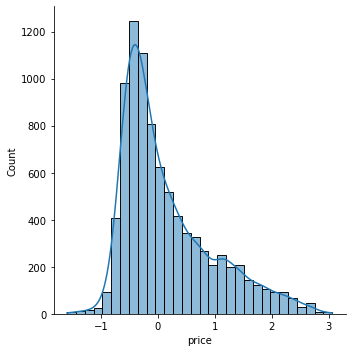

In [489]:
sns.displot(y_test-model_test_preds, bins=30, kde=True)
plt.savefig('What-Drives-the-Price-of-a-Car/images/Model3_4.png')

<h6>Non-zero Coeficients by using Hold-Out Cross-Validation, Lasso Regression, and estimating the optimun number of features using GridSearchCV</h6>

In [490]:
best_model3=model_grid.best_estimator_
coefs3=best_model3['targetregressor'].regressor_.coef_

In [491]:
coefs3[coefs3 != 0]

array([ 0.0093287 , -0.05977119,  0.03774182,  0.00452588,  0.10250816,
       -0.03045104])

In [492]:
X_train.iloc[:,coefs3!=0].columns

Index(['automatic', 'truck', 'hybrid', 'ford', 'odometer', 'ny'], dtype='object')

In [496]:
pd.DataFrame(coefs3[coefs3 != 0], columns=['coef_best_model'], index = ['automatic', 'truck', 'hybrid', 'ford', 'odometer', 'ny'
]).sort_values(by = "coef_best_model", ascending = False)

,coef_best_model
odometer,0.102508
hybrid,0.037742
automatic,0.009329
ford,0.004526
ny,-0.030451
truck,-0.059771


In [497]:
model_grid.cv_results_

{'mean_fit_time': array([0.47088013, 0.152911  , 0.12773242, 0.13039818, 0.13323007]),
 'std_fit_time': array([0.31299832, 0.03890828, 0.00640338, 0.00750501, 0.01182014]),
 'mean_score_time': array([0.03646526, 0.01799984, 0.02486606, 0.01710229, 0.01727829]),
 'std_score_time': array([0.01619416, 0.00198469, 0.01434634, 0.00122308, 0.00133732]),
 'param_targetregressor__regressor__alpha': masked_array(data=[0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'targetregressor__regressor__alpha': 0.1},
  {'targetregressor__regressor__alpha': 1.0},
  {'targetregressor__regressor__alpha': 10.0},
  {'targetregressor__regressor__alpha': 100.0},
  {'targetregressor__regressor__alpha': 1000.0}],
 'split0_test_score': array([ 0.39999854, -0.03862129, -0.03862129, -0.03862129, -0.03862129]),
 'split1_test_score': array([ 0.41791328, -0.02342143, -0.02342143, -0.02342143, -0.02342143]),
 'split2

<h4 style="color:red;">Method 4:</h4><p>Ordinarily Least Squares (OLS)</p>

<h6>Pipeline model using Ordinarily Least Squares</h6>

In [746]:
ols_pipe_linear = Pipeline([('transformer',ordinal_ohe_transformer),('scale', StandardScaler()), ('targetregressor',TransformedTargetRegressor(func=np.log1p,inverse_func=np.expm1,regressor= LinearRegression()))])
ols_pipe_linear

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])])),
                ('scale', StandardScaler()),
                ('targetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

<h6>Using K-Fold cross-validation method to evaluate metrics</h6>

In [713]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores7 = cross_val_score(ols_pipe_linear, X_1,y,scoring='neg_mean_squared_error',cv=cv)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accep

In [714]:
cv = KFold(n_splits=5)
#model_grid_lasso = GridSearchCV(selector_pipe_lasso, param_grid=sequential_param_dict)
scores8 = cross_val_score(ols_pipe_linear, X_1,y,scoring='r2',cv=cv)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accep

In [720]:
print('K-Fold Cross Validation ‘neg_mean_squared_error scores: %s' % scores7)
print('K-Fold Cross Validation ‘neg_mean_squared_error: %.3f +/- %.3f' % (np.mean(scores7),np.std(scores7)))
print('K-Fold Cross Validation r^2 scores: %s' % scores2)
print('K-Fold Cross Validation R^2: %.3f +/- %.3f' % (np.mean(scores5),np.std(scores8)))

K-Fold Cross Validation ‘neg_mean_squared_error scores: [nan nan nan nan nan]
K-Fold Cross Validation ‘neg_mean_squared_error: nan +/- nan
K-Fold Cross Validation r^2 scores: [0.79208419 0.791741   0.82771156 0.80179281 0.82569863]
K-Fold Cross Validation R^2: nan +/- nan


<h6>Using Hold-Out Cross-validation method to evaluate metrics (same as previous model)</h6>

In [747]:
ols_pipe_linear.fit(X_train, y_train)
model_train_preds = ols_pipe_linear.predict(X_train)
model_test_preds = ols_pipe_linear.predict(X_test)
model_train_mse = mean_squared_error(y_train,model_train_preds)
model_test_mse = mean_squared_error(y_test, model_test_preds)
print(f'OLS Train MSE: {model_train_mse}')
print(f'OLS Test MSE: {model_test_mse}')
print(f'OLS Score::{r2_score(y_true=y_test, y_pred=model_test_preds)}')

OLS Train MSE: 0.20465559002988262
OLS Test MSE: 0.19559244067380743
OLS Score::0.8252492058709974


<h6>Histogram difference between validation data and the one predicted by the Ridge regression model</h6>

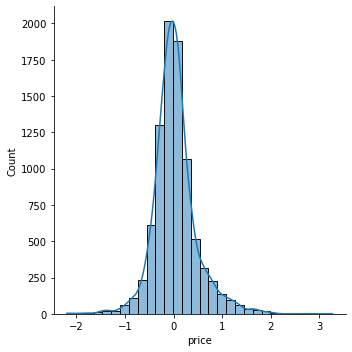

In [736]:
sns.displot(y_test-model_test_preds, bins=30, kde=True);
#plt.savefig('What-Drives-the-Price-of-a-Car/images/Model4_3.png')

<h6>Coeficients estimated by using Hold-Out Cross-Validation, and Linear Regression Model.</h6>

In [748]:
coefs4=ols_pipe['targetregressor'].regressor_.coef_

In [750]:
coefs4[coefs4 != 0]

array([ 1.50872712e-02,  3.47406131e+11,  3.17072454e+11,  1.74751977e+11,
        1.62405884e+11, -3.51349376e+11, -3.37169847e+11,  1.45085300e+12,
        1.38284994e+12, -3.17121407e+11,  1.37961360e+11,  1.17617988e+12,
        1.54266629e+11,  1.41814533e+11,  6.77238196e+10, -2.07872355e+11,
        8.83178711e-02, -1.77704088e+11,  5.54809570e-02,  9.72631068e+10,
       -1.48208511e+11, -1.48302352e+11,  1.56708438e+11, -1.08034256e+11,
        5.83359656e+10,  1.36107560e+11, -1.17479221e+11, -1.07766463e+11,
        1.21240063e+11,  1.16251872e+11,  2.68554688e-02,  1.03861905e+11,
        9.79355907e+10,  2.99682617e-02,  4.23078009e+10,  3.54886900e+10,
        5.63120017e+10,  5.37340291e+10,  5.27717548e+10, -3.79372429e+10,
       -3.87176408e+10, -2.68414360e+10,  2.69242241e+10,  1.18706416e+11,
        1.18010937e+11,  1.12582076e+11,  1.19827271e-01,  1.08581543e-01,
        2.37745857e+10,  1.17065430e-01,  9.06181335e-02,  1.62001940e+10,
        5.41687012e-02,  

In [751]:
X_train.iloc[:,coefs4!=0].columns

Index(['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd', 'fwd',
       'truck', 'hybrid',
       ...
       'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn'],
      dtype='object', length=136)

In [752]:
coef4=pd.DataFrame(coefs4[coefs4 != 0], columns=['coef_best_model'], index = ['gas', 'diesel', 'automatic', 'manual', 'SUV', 'sedan', '4wd',
       'fwd', 'truck', 'hybrid', 'rwd', 'full-size', 'mid-size',
       'other_transmission', 'pickup', 'clean', 'van', 'rebuilt',
       'compact', 'coupe', 'hatchback', 'white', 'wagon', 'electric',
       'black', 'convertible', 'mini-van', 'silver', 'grey', 'salvage',
       'blue', 'red', 'lien', 'sub-compact', 'other_fuel', 'custom',
       'green', 'brown', 'other_type', 'offroad', 'bus', 'yellow',
       '4 cylinders', '6 cylinders', '8 cylinders', 'ford', 'chevrolet',
       'orange', 'toyota', 'honda', 'purple', 'nissan', 'jeep', 'gmc',
       'ram', 'subaru', 'dodge', 'hyundai', 'bmw', 'volkswagen',
       'mercedes-benz', 'kia', 'lexus', 'chrysler', 'cadillac',
       'mitsubishi', 'audi', 'buick', 'mazda', '5 cylinders', 'volvo',
       '10 cylinders', 'infiniti', 'acura', 'lincoln', 'mini', 'pontiac',
       'rover', 'saturn', 'porsche', 'mercury', 'other_cylinders',
       'jaguar', 'fiat', '3 cylinders', 'alfa-romeo', 'tesla',
       'harley-davidson', '12 cylinders', 'year', 'odometer', 'ny', 'nj',
       'oh', 'pa', 'vt', 'fl', 'condition', 'ma', 'wi', 'mn', 'ct', 'va',
       'co', 'tx', 'az', 'ia', 'dc', 'ks', 'ak', 'ri', 'mi', 'in', 'il',
       'ky', 'nh', 'ga', 'me', 'nv', 'wv', 'or', 'mt', 'la', 'al', 'md',
       'ar', 'ms', 'ok', 'mo', 'nd', 'ne', 'ut', 'hi', 'ca', 'nm', 'tn']).sort_values(by = "coef_best_model", ascending = False)

<h6>Listing the 10 largest coeficients for the Linear Regression Model.</h6>

coef4.query('coef_best_model>0').sort_values(by = "coef_best_model", ascending = False).head(10)

<h3 style="color:red;">Evaluation</h3>

<h4>Ranking Regression Models built by comparing their metrics</h4>

In [773]:
mse_11 = pd.DataFrame([('Ridge', 0.1959),
                   ('SQ', 0.2405),
                   ('Lasso', 0.6612),
                   ('OLS', 0.1955)],
           columns=('Model','MSE')
                 )

In [774]:
plotdata1 = pd.DataFrame(
    {"MSE": [0.1959, 0.2405, 0.6612, 0.1955]}, 
    index=["Ridge", "SQL", "Lasso", "OLS"])

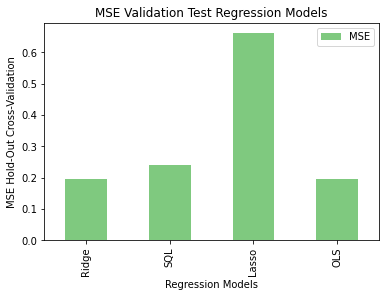

In [814]:
plotdata1.plot(kind="bar",stacked=True,colormap='Accent')
plt.title("MSE Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("MSE Hold-Out Cross-Validation")
plt.savefig('What-Drives-the-Price-of-a-Car/images/MSE_1.png')

In [785]:
plotdata2 = pd.DataFrame(
    {"MSE": [0.212, 0.253, 0.654]}, 
    index=["Ridge", "SQL", "Lasso"])

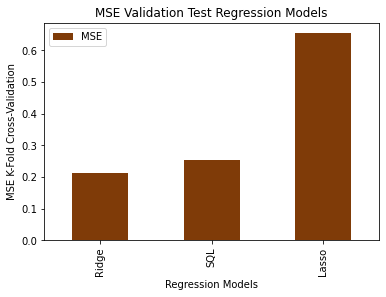

In [786]:
plotdata2.plot(kind="bar",stacked=True,colormap='PuOr')
plt.title("MSE Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("MSE K-Fold Cross-Validation")
plt.savefig('What-Drives-the-Price-of-a-Car/images/MSE_2.png')

In [787]:
plotdata3 = pd.DataFrame(
    {"R^2 Score": [0.8249, 0.7851, 0.4156,0.8252]}, 
    index=["Ridge", "SQL", "Lasso","OLS"])

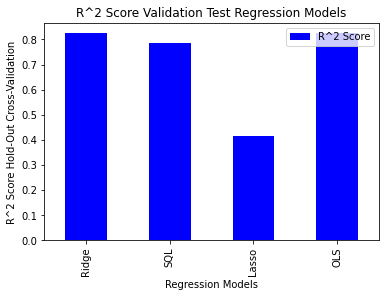

In [805]:
plotdata3.plot(kind="bar",stacked=True,colormap='winter')
plt.title("R^2 Score Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R^2 Score Hold-Out Cross-Validation")
plt.legend(loc='upper right')
plt.savefig('What-Drives-the-Price-of-a-Car/images/R2Score_3.png')

In [797]:
plotdata4 = pd.DataFrame(
    {"R^2 Score": [0.808, 0.770, 0.405]}, 
    index=["Ridge", "SQL", "Lasso"])

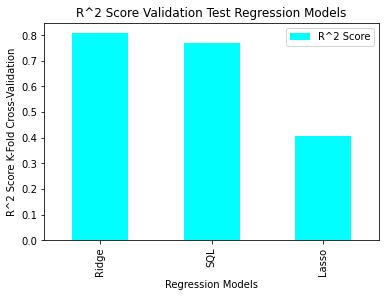

In [813]:
plotdata4.plot(kind="bar",stacked=True,colormap='cool')
plt.title("R^2 Score Validation Test Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("R^2 Score K-Fold Cross-Validation")
plt.savefig('What-Drives-the-Price-of-a-Car/images/R2Score_4.png')

<h4 style="color:red;">Observation:</h4>

<p>The MSE's and R^2 score metrics estimated in the different regression models using the hold-out cross-validation technique indicated that  the lowest MSE and highest R^2 score are basically shared between the Ridge and OLS Regression Models, however, it is thought that the regression coefficients obtained in the Ridge Model looked more reasonable, plus the OLS method failed when the F-Fold cross-validation method was intended to be applied. Consequently, the Ridge regression model was chosen as the best, i.e. recommended to make prediction on the price of the used cars</p>

<h2 style="color:red;">Main Conclusions & Recomendations<h2>

<p>1. The final dataset, after cleaning, removing outliers, converting the categoricals data in 0 and 1 values, and dropping the less important columns consists of 136 columns and 429250 rows. The target columns was "price".</p>

<p>2. The best regression model is the Ridge based on the metric estimated using both the hold-out and K-Fold cross-validation methods.An excelente R^2 score (a goodness-of-fit measure for linear regression models) of 0.82 was obtained, i.e., indicating how well this regression model fits the validation dataset.</p>

<p>3. It is important to highlight that the numerical variables "price", "odometer", and "year" were divided by 10000, 100000, and 1000 respectively, before initiating the regression modeling, since the rest of the columns have values 0 and 1, but the variable "conditon which is ordinal (i.e., integer values from 0 to 5). This step was very important to greatly improved the metrics,etc of the regression models tested.</p>

<p>4. The three most important features were "gas","diesel", and "automatic" in that order, according to the permutation_importance function using the the hold-out cross-validation method, and Ridge regression model.The 10 most important coefficients contributing positively to the used car price, and the 10's that contribute most negatively are shown in tables 2 and 3 respectively</p>

<p>5. There were only three numerical variables in the initial dataset, the rest were categoricals that were converted to values 0 and 1, but just one ordinal (integer values ranging from 0 to 5). Therefore, there were way too many variables with values 0 and 1 to be used in the modeling phase, limiting at some extend some options that could have been used to improve the prediction, such as the use of polynomial features with degree greater than 1. It took forever even for degree equal to 2. A possible solution is to drastically limit the number of variables into the regression modeling by using the final permutation_importance results obtained at the end of this study.</p>

<p>6. It is thought that the number of features could be reduced by applying PCA, and some clustering algorithm, making sure that removing a given feature, the clustering results are not affected.</p>